此專案(face_project)環境
1.虛擬環境
2.使用python3.9,請確認右上角為python39

In [1]:
import sys
# sys.path.append('C:\\Users\\Leo\\Anaconda3\\envs\\face_project\\Lib\\site-packages')
print("path -->",sys.path,"\n")
print("V -->",sys.version,"\n")

#確認是否使用虛擬環境內的python版本，如果不是須設定
print("exe -->",sys.executable,"\n")


path --> ['C:\\Users\\Leo\\Desktop\\face_project\\人臉辨識專案_39', 'C:\\Users\\Leo\\Anaconda3\\envs\\face_project\\python39.zip', 'C:\\Users\\Leo\\Anaconda3\\envs\\face_project\\DLLs', 'C:\\Users\\Leo\\Anaconda3\\envs\\face_project\\lib', 'C:\\Users\\Leo\\Anaconda3\\envs\\face_project', '', 'C:\\Users\\Leo\\Anaconda3\\envs\\face_project\\lib\\site-packages', 'C:\\Users\\Leo\\Anaconda3\\envs\\face_project\\lib\\site-packages\\win32', 'C:\\Users\\Leo\\Anaconda3\\envs\\face_project\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Leo\\Anaconda3\\envs\\face_project\\lib\\site-packages\\Pythonwin'] 

V --> 3.9.0 (default, Nov 15 2020, 08:30:55) [MSC v.1916 64 bit (AMD64)] 

exe --> C:\Users\Leo\Anaconda3\envs\face_project\python.exe 



In [4]:
#-----------------------------------收集照片用
import os
import time
import uuid
import cv2

#必須先有pic資料夾以及who資料夾(who改成人員名稱)
IMAGES_PATH = os.path.join('pic','Leo')
#30，為拍照張數
number_images = 30
#開鏡頭
cap = cv2.VideoCapture(0)
#抓取照片，並存入資料夾底下./pic/who

for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    # 當按下Esc結束迴圈
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break

#關閉相機
cap.release()
cv2.destroyAllWindows()

In [6]:
#------------------------------即時辨識打卡系統(openccv + arcface)
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import time

#opencv人臉辨識檔案
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#開啟相機
cap = cv2.VideoCapture(0)

#定義顯示文字參數
text = ''
name_org = (40, 80)
time_org = (40, 90)
fontFace = cv2.FONT_HERSHEY_COMPLEX
fontScale = 1
fontcolor = (0, 255, 0) # BGR
thickness = 2 
lineType = 4
bottomLeftOrigin = 1

#開始辨識
while True:
    #讀取影像
    _, img_raw = cap.read()
    #轉成灰階模式
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #此方法的任務是檢測不同大小的對象，並返回矩形的列表
    #詳細解釋可參考 https://blog.csdn.net/leaf_zizi/article/details/107637433
    #face_cascade.detectMultiScale(輸入圖片，預設1比1，預設3，愈大愈不容易亂抓畫面)
    faces = face_cascade.detectMultiScale(img_raw, 1.1, 10)
    # print("faces-->",faces)

    for i in range(len(faces)):
        try:
            #臉部位置
            face_x, face_y, face_w, face_h = faces[i]
            
            #抓出人臉
            img = img_raw[int(face_y):int(face_y+face_h), int(face_x):int(face_x+face_w)]

            #標記人臉範圍，名字位置，時間位置
            # for (x, y, w, h) in faces:
            cv2.rectangle(img_raw, (face_x, face_y), (face_x+face_w, face_y+face_h), (0, 255, 0), 2)
            name_org = (face_x, face_y-30)
            time_org = (face_x, face_y)
                
            #透過arcface辨識，img為辨識目標位置，db_path為影像資料庫位置
            df = DeepFace.find(img, db_path = "pic", model_name = 'ArcFace',enforce_detection=False)
            print(df.head())

            #驗證圖片
            # result = DeepFace.verify(img, "pic", model_name = 'ArcFace',enforce_detection=False)
            # print(result)
            
            try:
                #抓取辨識名字
                name = df.loc[0].values[0].split('/')[-2].split('\\')[-1]
                #抓取當前時間
                Time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())

                #顯示名字、時間到畫面上
                cv2.putText(img_raw, name, name_org, fontFace, fontScale, fontcolor, thickness, lineType)
                cv2.putText(img_raw, Time, time_org, fontFace, fontScale, fontcolor, thickness, lineType)

                #打卡紀錄
                punch_path = 'output.txt'
                with open(punch_path, 'a') as f:
                    f.write(f"{name} at {Time} punch cad.\n")

                print(f"我辨識這位是 {name}。")
            except:
                pass
        except:
            pass
    #正常視窗大小
    cv2.namedWindow('img', cv2.WINDOW_NORMAL)
    #秀出圖片                                           
    cv2.imshow('img', img_raw)                     

    # 當按下Esc結束迴圈
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
        
#關閉相機
cap.release()
cv2.destroyAllWindows()



There are  140  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.15763616561889648  seconds
                                            identity  ArcFace_cosine
0  pic\Kevin/13b11fc2-0453-11ed-9e7e-80fa5b8152af...        0.012286
1  pic\Kevin/135fb401-0453-11ed-8bdc-80fa5b8152af...        0.012327
2  pic\Kevin/1453fcaa-0453-11ed-9260-80fa5b8152af...        0.012482
3  pic\Kevin/130e0b51-0453-11ed-84ca-80fa5b8152af...        0.012609
4  pic\Kevin/14032b31-0453-11ed-a531-80fa5b8152af...        0.012786
我辨識這位是 Kevin。
There are  140  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.12757325172424316  seconds
                                            identity  ArcFace_cosine
0  pic\Kevin/0fe59c48-0453-11ed-8aae-80fa5b8152af...        0.013576
1  pic\Kevin/135fb401-0453-11ed-8bdc-80fa5b8152af...        0.013631
2  pic\Kevin/1453fcaa

4  pic\Leo/27fc3040-0904-11ed-8019-c4bde5322980.jpg        0.163713
我辨識這位是 Leo。
There are  140  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 13ms/step
find function lasts  0.09966707229614258  seconds
                                           identity  ArcFace_cosine
0  pic\Leo/2850dccf-0904-11ed-8e52-c4bde5322980.jpg        0.114579
1  pic\Leo/27fc3040-0904-11ed-8019-c4bde5322980.jpg        0.141733
2  pic\Leo/31666c8c-0904-11ed-8e49-c4bde5322980.jpg        0.145893
3  pic\Leo/2975b67c-0904-11ed-bc23-c4bde5322980.jpg        0.148147
4  pic\Leo/3069d377-0904-11ed-88f5-c4bde5322980.jpg        0.157109
我辨識這位是 Leo。
There are  140  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 13ms/step
find function lasts  0.09667658805847168  seconds
                                           identity  ArcFace_cosine
0  pic\Leo/2975b67c-0904-11ed-bc23-c4bde5322980.jpg        0.121006
1  pic\Leo/27fc3040-

4  pic\Leo/2975b67c-0904-11ed-bc23-c4bde5322980.jpg        0.196872
我辨識這位是 Leo。
There are  140  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 13ms/step
find function lasts  0.09663796424865723  seconds
                                           identity  ArcFace_cosine
0  pic\Leo/30bd2aeb-0904-11ed-99db-c4bde5322980.jpg        0.115753
1  pic\Leo/3069d377-0904-11ed-88f5-c4bde5322980.jpg        0.149618
2  pic\Leo/29ccb853-0904-11ed-aa0e-c4bde5322980.jpg        0.169860
3  pic\Leo/31666c8c-0904-11ed-8e49-c4bde5322980.jpg        0.173973
4  pic\Leo/27fc3040-0904-11ed-8019-c4bde5322980.jpg        0.192241
我辨識這位是 Leo。
There are  140  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 14ms/step
find function lasts  0.10265707969665527  seconds
                                           identity  ArcFace_cosine
0  pic\Leo/2f6d402f-0904-11ed-ad05-c4bde5322980.jpg        0.099563
1  pic\Leo/3069d377-

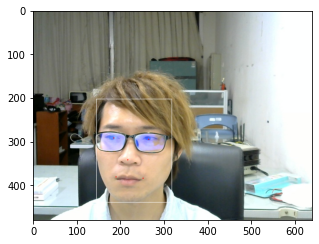

There are  7  representations found in  representations_arcface.pkl
1/1 [==============================] - 1s 517ms/step
find function lasts  1.2104156017303467  seconds
Empty DataFrame
Columns: [identity, ArcFace_cosine]
Index: []
1/1 [==============================] - 0s 17ms/step
{'verified': False, 'distance': 0.8888326757344303, 'threshold': 0.4, 'model': 'ArcFace', 'detector_backend': 'retinaface', 'similarity_metric': 'cosine'}


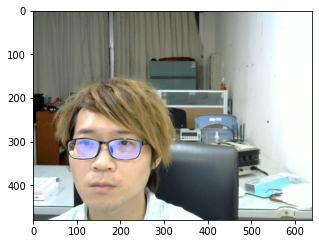

In [2]:
#--------------------------------------------------輸入照片圖片模式(retinaface + arcface)
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import time

#圖像辨識-------------------------------------------------------

#讀取圖像
img = cv2.imread("test_img\\001.jpg")


#轉正臉
# faces2 = RetinaFace.extract_faces(img, align = True)
# for face in faces2:
#     plt.imshow(face)
#     plt.show()

#透過RetinaFace辨識人像，默認閾值設置為 0.9。如果要以低解析度檢測人臉，則可以降低它。
faces  = RetinaFace.detect_faces(img,threshold = 0.9)

#圖像參數
faces.keys()

try:
    #取出參數
    for key in faces.keys():

        #第X張人像總參數
        identity = faces[key]

        #人像矩形邊界參數
        facial_area = identity["facial_area"]

        #特徵標記
        landmarks = identity["landmarks"]

        #將numpy.float數值轉換為int，因為cv2.circle參數center格式需要int
        le = tuple(map(int,landmarks["left_eye"]))
        re = tuple(map(int,landmarks["right_eye"]))
        n  = tuple(map(int,landmarks["nose"]))
        lm = tuple(map(int,landmarks["mouth_left"]))
        rm = tuple(map(int,landmarks["mouth_right"]))
        
        #框出人像
        cv2.rectangle(img, (facial_area[2],facial_area[3]),(facial_area[0],facial_area[1]),(255,255,255),1)
        #標記左眼位置
        cv2.circle(img, le, 1, (0, 0, 255), -1)
        #標記右眼位置
        cv2.circle(img, re, 1, (0, 0, 255), -1)
        #標記鼻子位置
        cv2.circle(img, n, 1, (0, 0, 255), -1)
        #標記左嘴角位置
        cv2.circle(img, lm, 1, (0, 0, 255), -1)
        #標記右嘴角位置
        cv2.circle(img, rm, 1, (0, 0, 255), -1)   

    #設定顯示圖片大小
    plt.figure(figsize = (5,5))
    #使圖片顯示完整
    plt.imshow(img[:,:,::-1])
    #顯示圖片
    plt.show()

#-------find & verfiy distance太大的時候，建議可以縮小threshold的大小-----------
#-------修改threshold檔案為\deepface\commons\distance.py----------------------

    #透過arcface辨識，img為辨識目標位置，db_path為影像資料庫位置
    #find()預設有轉正臉
    df = DeepFace.find(img, db_path = "pic\\Ester", model_name = 'ArcFace',detector_backend = 'retinaface',enforce_detection=False)
    #顯示比對照片路徑&consine值
    print(df.head())

    #驗證圖片
    result = DeepFace.verify(img, "test_img\\0009.jpg", model_name = 'ArcFace',detector_backend = 'retinaface',enforce_detection=False)
    print(result)
#----------------------------------------------------------------------------

    #讀取圖像
    img2 = cv2.imread("test_img\\002.jpg")
    #設定顯示圖片大小
    plt.figure(figsize = (5,5))
    #使圖片顯示完整
    plt.imshow(img2[:,:,::-1])
    #顯示圖片
    plt.show()


    try:
        #抓取辨識名字
        name = df.loc[0].values[0].split('/')[-2].split('\\')[-1]
        #抓取當前時間
        Time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        # cv2.putText(img, name, name_org, fontFace, fontScale, fontcolor, thickness, lineType)
        # cv2.putText(img, Time, time_org, fontFace, fontScale, fontcolor, thickness, lineType)
        print(f"我辨識這位是 {name}。")
    except:
        pass
except:
    print("!! 辨識失敗 !!")    


In [8]:
#--------------------------------------------------輸入影片模式(retinaface + arcface)
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import time

#影像辨識-------------------------------------------------------
cap = cv2.VideoCapture('test.mp4')

while(True):
    _, img = cap.read()
    try:

    #圖像辨識-------------------------------------------------------

    #透過RetinaFace辨識人像，默認閾值設置為 0.9。如果要以低解析度檢測人臉，則可以降低它。
        faces  = RetinaFace.detect_faces(img,threshold = 0.9)

        #圖像參數
        faces.keys()
        
        #取出參數
        for key in faces.keys():

            #第X張人像總參數
            identity = faces[key]

            #人像矩形邊界參數
            facial_area = identity["facial_area"]

            #特徵標記
            landmarks = identity["landmarks"]

            #將numpy.float數值轉換為int，因為cv2.circle參數center格式需要int
            le = tuple(map(int,landmarks["left_eye"]))
            re = tuple(map(int,landmarks["right_eye"]))
            n  = tuple(map(int,landmarks["nose"]))
            lm = tuple(map(int,landmarks["mouth_left"]))
            rm = tuple(map(int,landmarks["mouth_right"]))
            
            #框出人像
            cv2.rectangle(img, (facial_area[2],facial_area[3]),(facial_area[0],facial_area[1]),(255,255,255),1)
            #標記左眼位置
            cv2.circle(img, le, 1, (0, 0, 255), -1)
            #標記右眼位置
            cv2.circle(img, re, 1, (0, 0, 255), -1)
            #標記鼻子位置
            cv2.circle(img, n, 1, (0, 0, 255), -1)
            #標記左嘴角位置
            cv2.circle(img, lm, 1, (0, 0, 255), -1)
            #標記右嘴角位置
            cv2.circle(img, rm, 1, (0, 0, 255), -1)   

        # #設定顯示圖片大小
        # plt.figure(figsize = (5,5))
        # #使圖片顯示完整
        # plt.imshow(img[:,:,::-1])
        # #顯示圖片
        # plt.show()

        #透過arcface辨識，img為辨識目標位置，db_path為影像資料庫位置
        df = DeepFace.find(img, db_path = "pic\\Ester", model_name = 'ArcFace',detector_backend = 'retinaface',enforce_detection=False)
        print(df.head())

        #驗證圖片
        result = DeepFace.verify(img, "pic\\Ester\\ester2000.jpg", model_name = 'ArcFace',detector_backend = 'retinaface',enforce_detection=False)
        print(result)
        
        try:
            #抓取辨識名字
            name = df.loc[0].values[0].split('/')[-2].split('\\')[-1]
            #抓取當前時間
            Time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
            # cv2.putText(img, name, name_org, fontFace, fontScale, fontcolor, thickness, lineType)
            # cv2.putText(img, Time, time_org, fontFace, fontScale, fontcolor, thickness, lineType)
            print(f"我辨識這位是 {name}。")
        except:
            pass
    except:
        print("!! 辨識失敗 !!")
            
    # 當按下Esc結束迴圈
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
    cv2.imshow("video",img)
cap.release()
cv2.destroyAllWindows()

There are  7  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 14ms/step
find function lasts  0.13355374336242676  seconds
Empty DataFrame
Columns: [identity, ArcFace_cosine]
Index: []
1/1 [==============================] - 0s 14ms/step
{'verified': False, 'distance': 0.8220573362674639, 'threshold': 0.4, 'model': 'ArcFace', 'detector_backend': 'retinaface', 'similarity_metric': 'cosine'}
There are  7  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 16ms/step
find function lasts  0.1315608024597168  seconds
Empty DataFrame
Columns: [identity, ArcFace_cosine]
Index: []
1/1 [==============================] - 0s 13ms/step
{'verified': False, 'distance': 0.8277142685724743, 'threshold': 0.4, 'model': 'ArcFace', 'detector_backend': 'retinaface', 'similarity_metric': 'cosine'}
There are  7  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 16ms/step
fin

{'verified': False, 'distance': 0.7860833216145734, 'threshold': 0.4, 'model': 'ArcFace', 'detector_backend': 'retinaface', 'similarity_metric': 'cosine'}
There are  7  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 14ms/step
find function lasts  0.12458348274230957  seconds
Empty DataFrame
Columns: [identity, ArcFace_cosine]
Index: []
1/1 [==============================] - 0s 16ms/step
{'verified': False, 'distance': 0.7891456491068551, 'threshold': 0.4, 'model': 'ArcFace', 'detector_backend': 'retinaface', 'similarity_metric': 'cosine'}
There are  7  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 14ms/step
find function lasts  0.12458348274230957  seconds
Empty DataFrame
Columns: [identity, ArcFace_cosine]
Index: []
1/1 [==============================] - 0s 15ms/step
{'verified': False, 'distance': 0.809576138993199, 'threshold': 0.4, 'model': 'ArcFace', 'detector_backend': 'retinaface',

以下為人臉辨識4大步驟拆解

faces -->  {'face_1': {'score': 0.9992092847824097, 'facial_area': [145, 203, 318, 439], 'landmarks': {'right_eye': [185.11569, 292.45447], 'left_eye': [265.9711, 295.43378], 'nose': [217.7844, 342.38272], 'mouth_right': [190.55728, 381.90762], 'mouth_left': [252.19519, 384.9289]}}} 



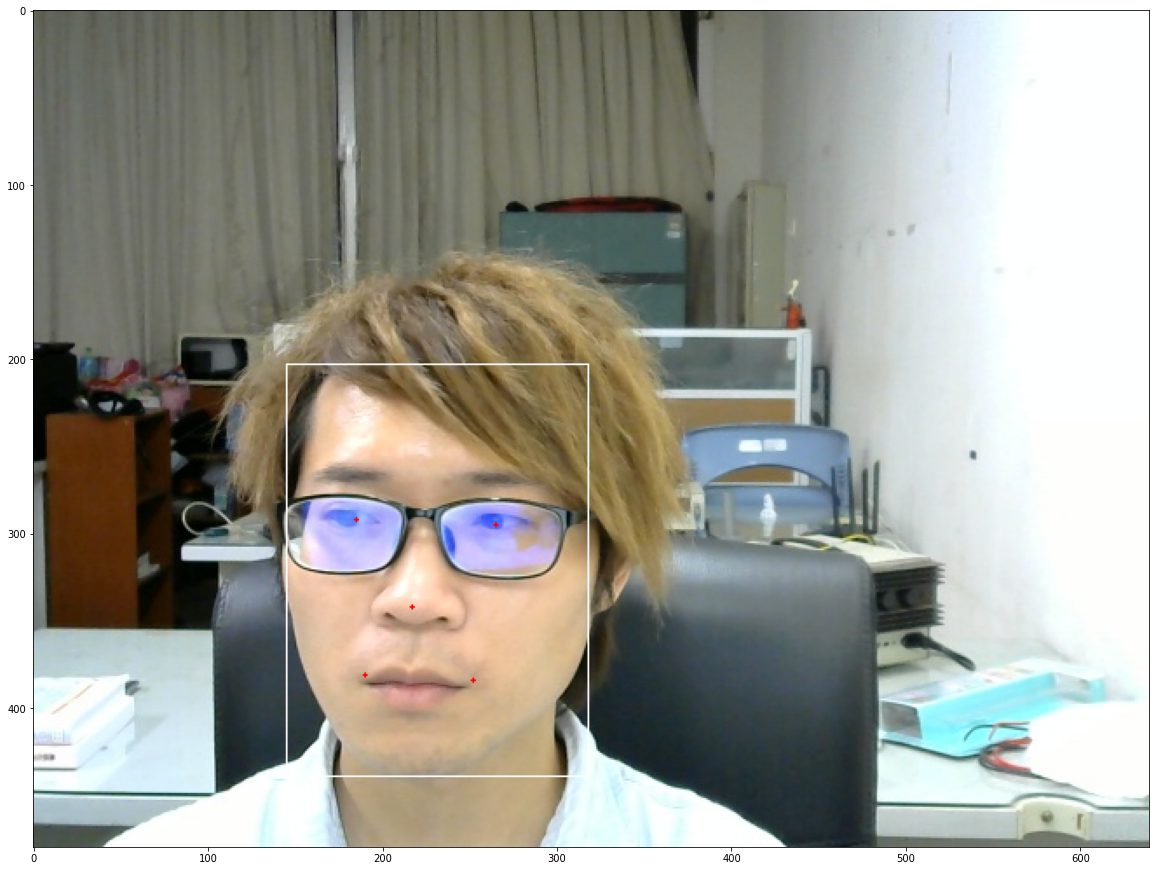

In [13]:
#----抓臉
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import time

#讀取圖像
img = cv2.imread("test_img\\001.jpg")
#透過RetinaFace辨識人像，默認閾值設置為 0.9。如果要以低解析度檢測人臉，則可以降低它。
faces  = RetinaFace.detect_faces(img,threshold = 0.9)

#圖像參數
#'score'越高此圖越像人臉， 'facial_area'座標參數，'landmarks': 包含眼睛鼻子嘴角的座標
print("faces --> ",faces,"\n")
# print("faces.keys() --> ",faces.keys(),"\n")

#取出參數
for key in faces.keys():

    #第X張人像總參數
    identity = faces[key]

    #人像矩形邊界參數
    facial_area = identity["facial_area"]

    #特徵標記
    landmarks = identity["landmarks"]

    #將numpy.float數值轉換為int，因為cv2.circle參數center格式需要int
    le = tuple(map(int,landmarks["left_eye"]))
    re = tuple(map(int,landmarks["right_eye"]))
    n  = tuple(map(int,landmarks["nose"]))
    lm = tuple(map(int,landmarks["mouth_left"]))
    rm = tuple(map(int,landmarks["mouth_right"]))
    
    #框出人像
    cv2.rectangle(img, (facial_area[2],facial_area[3]),(facial_area[0],facial_area[1]),(255,255,255),1)
    #標記左眼位置
    cv2.circle(img, le, 1, (0, 0, 255), -1)
    #標記右眼位置
    cv2.circle(img, re, 1, (0, 0, 255), -1)
    #標記鼻子位置
    cv2.circle(img, n, 1, (0, 0, 255), -1)
    #標記左嘴角位置
    cv2.circle(img, lm, 1, (0, 0, 255), -1)
    #標記右嘴角位置
    cv2.circle(img, rm, 1, (0, 0, 255), -1)   
#設定顯示圖片大小
plt.figure(figsize = (20,20))
#使圖片顯示完整
plt.imshow(img[:,:,::-1])
#顯示圖片
plt.show()


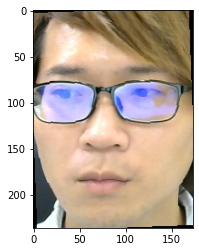

In [11]:
#----人臉轉正
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import time

#讀取圖像
img = cv2.imread("test_img\\001.jpg")

#轉正臉
#透過雙眼以及鼻子的位置，調整出正臉
faces2 = RetinaFace.extract_faces(img, align = True)

for face in faces2:
    plt.imshow(face)
    plt.show()

# plt.imsave('img2.png',image)
# plt.savefig("img2.jpg")

In [14]:
#----特徵向量
print(faces)

{'face_1': {'score': 0.9992092847824097, 'facial_area': [145, 203, 318, 439], 'landmarks': {'right_eye': [185.11569, 292.45447], 'left_eye': [265.9711, 295.43378], 'nose': [217.7844, 342.38272], 'mouth_right': [190.55728, 381.90762], 'mouth_left': [252.19519, 384.9289]}}}


1/1 [==============================] - 0s 16ms/step
verify -->  {'verified': True, 'distance': 0.13397025448594257, 'threshold': 0.4, 'model': 'ArcFace', 'detector_backend': 'retinaface', 'similarity_metric': 'cosine'} 

faces -->  {'face_1': {'score': 0.9992092847824097, 'facial_area': [145, 203, 318, 439], 'landmarks': {'right_eye': [185.11569, 292.45447], 'left_eye': [265.9711, 295.43378], 'nose': [217.7844, 342.38272], 'mouth_right': [190.55728, 381.90762], 'mouth_left': [252.19519, 384.9289]}}} 

faces2 -->  {'face_1': {'score': 0.9993866682052612, 'facial_area': [87, 208, 265, 466], 'landmarks': {'right_eye': [124.17084, 307.93555], 'left_eye': [206.92816, 310.1747], 'nose': [154.34543, 355.91788], 'mouth_right': [128.44, 401.8278], 'mouth_left': [195.21527, 403.85455]}}} 



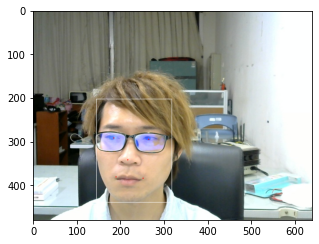

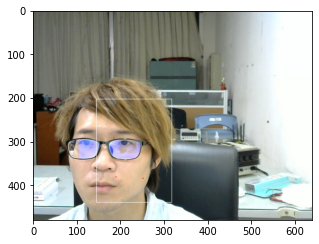

In [17]:
#----比對
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import time

#讀取圖像
img = cv2.imread("test_img\\001.jpg")
img2 = cv2.imread("test_img\\002.jpg")


#驗證圖片
result = DeepFace.verify(img, img2, model_name = 'ArcFace',detector_backend = 'retinaface',enforce_detection=False)
print("verify --> ",result,'\n')

#透過RetinaFace辨識人像，默認閾值設置為 0.9。如果要以低解析度檢測人臉，則可以降低它。
faces  = RetinaFace.detect_faces(img,threshold = 0.9)
faces2  = RetinaFace.detect_faces(img2,threshold = 0.9)

#圖像參數
print("faces --> ",faces,"\n")
# print("faces.keys() --> ",faces.keys(),"\n")

print("faces2 --> ",faces2,"\n")
# print("faces2.keys() --> ",faces2.keys(),"\n")

#取出參數
for twofaces in [faces,faces2]:
    for key in twofaces.keys():

        #第X張人像總參數
        identity = faces[key]

        #人像矩形邊界參數
        facial_area = identity["facial_area"]

        #特徵標記
        landmarks = identity["landmarks"]

        #將numpy.float數值轉換為int，因為cv2.circle參數center格式需要int
        le = tuple(map(int,landmarks["left_eye"]))
        re = tuple(map(int,landmarks["right_eye"]))
        n  = tuple(map(int,landmarks["nose"]))
        lm = tuple(map(int,landmarks["mouth_left"]))
        rm = tuple(map(int,landmarks["mouth_right"]))
        
        if twofaces == faces:
            img = img
        else:
            img = img2
        #框出人像
        cv2.rectangle(img, (facial_area[2],facial_area[3]),(facial_area[0],facial_area[1]),(255,255,255),1)
        #標記左眼位置
        cv2.circle(img, le, 1, (0, 0, 255), -1)
        #標記右眼位置
        cv2.circle(img, re, 1, (0, 0, 255), -1)
        #標記鼻子位置
        cv2.circle(img, n, 1, (0, 0, 255), -1)
        #標記左嘴角位置
        cv2.circle(img, lm, 1, (0, 0, 255), -1)
        #標記右嘴角位置
        cv2.circle(img, rm, 1, (0, 0, 255), -1)   

        #設定顯示圖片大小
        plt.figure(figsize = (5,5))
        #使圖片顯示完整
        plt.imshow(img[:,:,::-1])
        #顯示圖片
        plt.show()



In [4]:
#pkl檔案內容
import pickle
path = 'pic\\representations_arcface.pkl'

f = open(path,'rb')
data = pickle.load(f)

print(data[0])
# print(len(data[0][1]))

['pic\\Alex/00002.jpg', [-0.05015245079994202, -0.3196384906768799, -0.17641066014766693, 0.10860487073659897, -0.20909765362739563, 0.10626671463251114, -0.01837504841387272, -0.25084832310676575, 0.02340053766965866, -0.14578278362751007, -0.21168240904808044, 0.11584301292896271, -0.04754432663321495, 0.04988592118024826, 0.0024890322238206863, 0.23382514715194702, -0.12492309510707855, -0.2862280011177063, -0.2805459201335907, 0.3101450800895691, -0.12538838386535645, -0.027113862335681915, -0.05921938642859459, -0.0315069779753685, -0.10363524407148361, 0.021308794617652893, 0.10456347465515137, 0.23494283854961395, -0.0365108847618103, 0.01378663070499897, -0.28155142068862915, -0.155253604054451, 0.24028506875038147, 0.13141995668411255, -0.07104680687189102, 0.2978162467479706, -0.06012585014104843, -0.12814269959926605, 0.009053846821188927, 0.2648296058177948, -0.03259844705462456, 0.040981996804475784, 0.01493247039616108, -0.16351920366287231, 0.10620661824941635, 0.0049638